[View in Colaboratory](https://colab.research.google.com/github/aloksharma9656/unified/blob/master/Hello,_Colaboratory.ipynb)

# The main program start here

In [21]:
!pip install -q TextBlob
!pip install -q tweepy

# Smaller set of twitter datasets

In [70]:
import tweepy
from textblob import TextBlob
from google.colab import files
import csv
import matplotlib.pyplot as plt
import math

#Final sentiments of users
#fin_stm = []
#fin_time = []
fin_plot = {}

# Step 1 - Authenticate
consumer_key= 'RTP5kfuwc0Hd5RMavgD3zWAIN'
consumer_secret= 'mrBJ0UBWZn68oogvpNoCTvLyxP9SrTbdbtyT1kocDz8Bpz6XS4'

access_token='800060045958344704-XvugVHJtGsw2p3CDCzXRqznRzJjYWk1'
access_token_secret='WqmnO5RLU1MgWcV30sFGdL8APqnvgArfNLVN0dl33u9gl'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

#Step 3 - Retrieve Tweets
public_tweets = api.search('Bitcoin' or 'cryptocurrency' or 'ripple' or 'iota')

tweetCount = 0

#Step4 - Entering data into a csv file.
with open('livebitcoin.csv', 'w') as csvfile:
    fieldnames = ['Name', 'Total Tweets', 'Favourites_Count', 'Followers', 'User_Verified','User Location',
                 'Date of Tweet', 'Tweet Text', 'Tweet Retweet', 'sentiment', 'fin']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    for tweet in public_tweets:
        row = {}
        row['Name'] = (tweet.user.name)
        row['Total Tweets'] = (tweet.user.statuses_count)
        row['Favourites_Count'] = (tweet.user.favourites_count)
        row['Followers'] = (tweet.user.followers_count)
        if tweet.user.verified == True :
          row['User_Verified'] = 1
        else:
          row['User_Verified'] = 0
        #row['User_Verified'] = (tweet.user.verified)
        row['User Location'] = (tweet.user.location)
        row['Date of Tweet'] = (tweet.user.created_at)
        d = TextBlob(tweet.text)
        if d.detect_language() != 'en' :
          row['Tweet Text'] = (d.translate(to='en')) #Translates the tweets if they are not in english.
        else:
          row['Tweet Text'] = d
          
        row['Tweet Retweet'] = (tweet.retweet_count)
        t = TextBlob(tweet.text)
        row['sentiment'] = t.sentiment.polarity
        #print("hello", max('Total Tweets'))
        row['fin'] = ((1- 1/(1 + tweet.user.statuses_count)) + (1- 1/(1 + tweet.user.favourites_count)) + (1- 1/(1 + tweet.user.followers_count)) + t.sentiment.polarity)/4
        #fin_stm.append(row['fin'])
        #fin_time.append(row['Date of Tweet'])
        fin_plot[row['Date of Tweet']] = row['fin']
       
        
        writer.writerow(row)
        
    tweetCount += len(public_tweets)
    print("Downloaded {0} tweets".format(tweetCount))
      
import collections


od = collections.OrderedDict(sorted(fin_plot.items()))    

files.download('livebitcoin.csv')

Downloaded 13 tweets


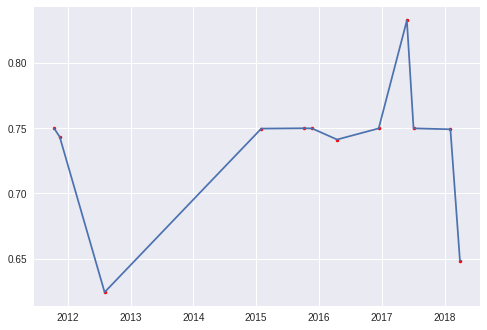

In [71]:
plt.plot(list(fin_plot.keys()), list(fin_plot.values()), 'r.')
plt.plot(list(od.keys()), list(od.values()))

# Importing datasets from twitter from last few years

In [72]:
import tweepy
from textblob import TextBlob
from google.colab import files
import csv
import matplotlib.pyplot as plt
import math

#Final sentiments of users
fin_plot = {}


  # Step 1 - Authenticate
consumer_key= 'RTP5kfuwc0Hd5RMavgD3zWAIN'
consumer_secret= 'mrBJ0UBWZn68oogvpNoCTvLyxP9SrTbdbtyT1kocDz8Bpz6XS4'

access_token='800060045958344704-XvugVHJtGsw2p3CDCzXRqznRzJjYWk1'
access_token_secret='WqmnO5RLU1MgWcV30sFGdL8APqnvgArfNLVN0dl33u9gl'

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
 
api = tweepy.API(auth, wait_on_rate_limit=True,
				 wait_on_rate_limit_notify=True)
 
if (not api):
    print ("Can't Authenticate")
    sys.exit(-1)


searchQuery = ('Bitcoin' or 'cryptocurrency' or 'ripple' or 'iota') # this is what we're searching for
maxTweets = 500 # Some arbitrary large number
tweetsPerQry = 100  # this is the max the API permits
since_date = "2018-01-01"

# If results from a specific ID onwards are reqd, set since_id to that ID.
# else default to no lower limit, go as far back as API allows
sinceId = None

# If results only below a specific ID are, set max_id to that ID.
# else default to no upper limit, start from the most recent tweet matching the search query.
max_id = -1

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))

with open('bitcoin.csv', 'w') as csvfile:
    fieldnames = ['Name', 'Total Tweets', 'Favourites_Count', 'Followers', 'User_Verified','User Location',
                 'Date of Tweet', 'Tweet Text', 'Tweet Retweet', 'sentiment', 'fin']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    while tweetCount < maxTweets:
        for tweet in new_tweets:
            row = {}
            row['Name'] = (tweet.user.name)
            row['Total Tweets'] = (tweet.user.statuses_count)
            row['Favourites_Count'] = (tweet.user.favourites_count)
            row['Followers'] = (tweet.user.followers_count)
            if tweet.user.verified == True :
              row['User_Verified'] = 1
            else:
              row['User_Verified'] = 0
            #row['User_Verified'] = (tweet.user.verified)
            row['User Location'] = (tweet.user.location)
            row['Date of Tweet'] = (tweet.user.created_at)
            #d = TextBlob(tweet.text)
            #if d.detect_language() != 'en' :
            #  row['Tweet Text'] = (d.translate(to='en')) #Translates the tweets if they are not in english.
            #else:
            #  row['Tweet Text'] = d
            row['Tweet Text'] = tweet.text

            row['Tweet Retweet'] = (tweet.retweet_count)
            t = TextBlob(tweet.text)
            row['sentiment'] = t.sentiment.polarity
            #print("hello", max('Total Tweets'))
            row['fin'] = ((1- 1/(1 + tweet.user.statuses_count)) + (1- 1/(1 + tweet.user.favourites_count)) + (1- 1/(1 + tweet.user.followers_count)) + t.sentiment.polarity)/4
            #fin_stm.append(row['fin'])
            #fin_time.append(row['Date of Tweet'])
            fin_plot[row['Date of Tweet']] = row['fin']


            writer.writerow(row)
        tweetCount += len(new_tweets)
        print("Downloaded {0} tweets".format(tweetCount))
        max_id = new_tweets[-1].id
print ("Downloaded {0} tweets".format(tweetCount))
import collections


od = collections.OrderedDict(sorted(fin_plot.items()))

print(od)
files.download('bitcoin.csv')

Downloaded 85 tweets
Downloaded 170 tweets
Downloaded 255 tweets
Downloaded 340 tweets
Downloaded 425 tweets
Downloaded 510 tweets
Downloaded 510 tweets
OrderedDict([(datetime.datetime(2008, 4, 23, 17, 27, 22), 0.7061513199444234), (datetime.datetime(2008, 7, 22, 23, 22, 53), 0.7491243448814018), (datetime.datetime(2009, 3, 21, 23, 32, 36), 0.7466933547442022), (datetime.datetime(2009, 3, 26, 12, 16, 52), 0.7890333969201118), (datetime.datetime(2009, 4, 4, 2, 11, 50), 0.7997533340755083), (datetime.datetime(2009, 6, 25, 10, 52, 15), 0.7486323355971918), (datetime.datetime(2009, 9, 2, 0, 42, 27), 0.6662590308738476), (datetime.datetime(2010, 2, 23, 13, 0, 50), 0.49944211024278806), (datetime.datetime(2010, 6, 27, 1, 36, 55), 0.7495995690062556), (datetime.datetime(2010, 7, 4, 1, 27, 29), 0.7874389921815547), (datetime.datetime(2010, 8, 25, 1, 25, 8), 0.8423014724649385), (datetime.datetime(2010, 10, 23, 18, 38, 38), 0.8749838167858448), (datetime.datetime(2011, 5, 29, 8, 25, 37), 0.7487

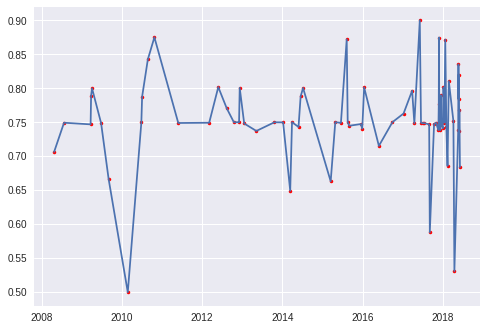

In [73]:
plt.plot(list(fin_plot.keys()), list(fin_plot.values()), 'r.')
plt.plot(list(od.keys()), list(od.values()))

(array([ 5.,  3.,  4.,  2.,  7.,  4.,  5.,  7.,  5., 33.]),
 array([733155.72733796, 733525.25999074, 733894.79264352, 734264.3252963 ,
        734633.85794907, 735003.39060185, 735372.92325463, 735742.45590741,
        736111.98856019, 736481.52121296, 736851.05386574]),
 <a list of 10 Patch objects>)

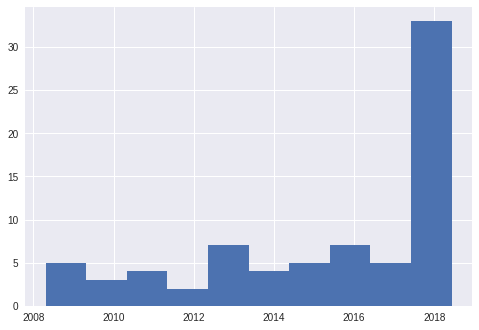

In [74]:
plt.hist(list(fin_plot.keys()))